In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import statistics
import matplotlib.pyplot as plt

### SQL Database

In [6]:
import sqlite3 # library for working with sqlite database
conn = sqlite3.connect("/Volumes/Abbi/MIMIC.db") # Create a connection to the on-disk database

In [3]:
pd.read_sql("SELECT * FROM sqlite_master where type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,CHARTEVENTS,CHARTEVENTS,2,"CREATE TABLE CHARTEVENTS(\n ""ROW_ID"" TEXT,\n ..."
1,table,PROCEDUREEVENTS_MV,PROCEDUREEVENTS_MV,9120960,"CREATE TABLE ""PROCEDUREEVENTS_MV"" (\n""index"" I..."
2,table,CALLOUT,CALLOUT,9132354,"CREATE TABLE ""CALLOUT"" (\n""index"" INTEGER,\n ..."
3,table,D_CPT,D_CPT,9133903,"CREATE TABLE ""D_CPT"" (\n""index"" INTEGER,\n ""R..."
4,table,D_ITEMS,D_ITEMS,9133909,"CREATE TABLE ""D_ITEMS"" (\n""index"" INTEGER,\n ..."
5,table,CAREGIVERS,CAREGIVERS,9134171,"CREATE TABLE ""CAREGIVERS"" (\n""index"" INTEGER,\..."
6,table,MICROBIOLOGYEVENTS,MICROBIOLOGYEVENTS,9134246,"CREATE TABLE ""MICROBIOLOGYEVENTS"" (\n""index"" I..."
7,table,LABEVENTS,LABEVENTS,9153054,"CREATE TABLE ""LABEVENTS"" (\n""index"" INTEGER,\n..."
8,table,INPUTEVENTS_CV,INPUTEVENTS_CV,9708019,"CREATE TABLE ""INPUTEVENTS_CV"" (\n""index"" INTEG..."
9,table,ADMISSIONS,ADMISSIONS,10291267,"CREATE TABLE ""ADMISSIONS"" (\n""index"" INTEGER,\..."


In [7]:
admissions_df = pd.read_sql("""SELECT *
                            FROM admissions
                            """, conn)

In [8]:
patients_df = pd.read_sql("""SELECT *
                            FROM patients
                            """, conn)

In [9]:
# Join admissions and patient
patient_admissions_df = pd.read_sql("""SELECT *
            FROM admissions 
            LEFT JOIN patients ON admissions.SUBJECT_ID = patients.SUBJECT_ID""", conn)

In [11]:
# Pull the admissions csv which contains only the admissions that met our criteria
final_table = pd.read_csv('/Users/shanduzamm/Abbi Data Sci 590/Final Project/data/admissions_final_cohort.csv')

In [12]:
# HADM_IDs that meet our criteria
final_HADM_ID = final_table['HADM_ID'].values

In [13]:
# Merged patients and admissions tables that only contains admissions and patients that met our criteria
final_patients_admissions = pd.DataFrame(patient_admissions_df.loc[patient_admissions_df['HADM_ID'].isin(final_HADM_ID)])

In [14]:
# How many patients are there in our final data set
num_patients = final_patients_admissions['SUBJECT_ID'].iloc[:,1].value_counts().shape[0]

In [15]:
# How many admissions are there in our final dataset
num_admissions = final_patients_admissions['HADM_ID'].value_counts().shape[0]

In [16]:
patient_ids = final_patients_admissions['SUBJECT_ID'].iloc[:,1].values

In [17]:
final_patients = patients_df.loc[patients_df['SUBJECT_ID'].isin(patient_ids)]

In [18]:
# Make an age column (age at admit)
final_patients_admissions['DOB'] = pd.to_datetime(final_patients_admissions['DOB'])
final_patients_admissions['ADMITTIME'] = pd.to_datetime(final_patients_admissions['ADMITTIME'])
final_patients_admissions['AGE'] = ((final_patients_admissions['ADMITTIME'] - final_patients_admissions['DOB']).dt.days / 365)

In [124]:
# Understand the age distribution of our data
final_patients_admissions['AGE'].describe()

count    41631.000000
mean        62.924717
std         16.443650
min         16.032877
25%         52.457534
50%         64.802740
75%         76.319178
max         89.060274
Name: AGE, dtype: float64

In [18]:
# Understand the gender distribution of our data
final_patients_admissions['GENDER'].describe()

count     41631
unique        2
top           M
freq      23772
Name: GENDER, dtype: object

In [20]:
# Understand the ethnicity distribution of our data
final_patients_admissions['ETHNICITY'].value_counts()

WHITE                                                       29299
BLACK/AFRICAN AMERICAN                                       3842
UNKNOWN/NOT SPECIFIED                                        3303
HISPANIC OR LATINO                                           1117
OTHER                                                         945
UNABLE TO OBTAIN                                              661
ASIAN                                                         625
PATIENT DECLINED TO ANSWER                                    402
HISPANIC/LATINO - PUERTO RICAN                                202
ASIAN - CHINESE                                               192
BLACK/CAPE VERDEAN                                            152
WHITE - RUSSIAN                                               123
BLACK/HAITIAN                                                  78
MULTI RACE ETHNICITY                                           77
WHITE - OTHER EUROPEAN                                         69
ASIAN - AS

In [21]:
final_table['length_of_stay_days'] = final_table['length_of_stay']/24

In [126]:
# Explore how long patients stayed in the hospital
final_table['length_of_stay_days'].describe()

count    41631.000000
mean         8.107847
std          6.636930
min          0.188889
25%          4.090972
50%          6.648611
75%         10.489931
max        206.425694
Name: length_of_stay_days, dtype: float64

In [23]:
# How many admits resulted in death?
final_table['DEATHTIME'].value_counts().sum()

4502

In [24]:
# What kinds of admissions did we have?
final_table['ADMISSION_TYPE'].value_counts()

EMERGENCY    33927
ELECTIVE      6701
URGENT        1003
Name: ADMISSION_TYPE, dtype: int64

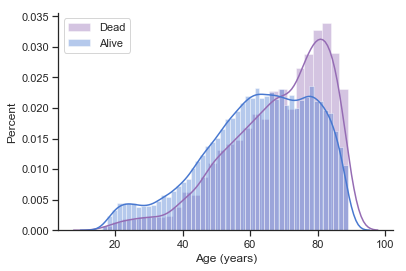

In [128]:
# Generate visualization of age of patients by live/dead
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.distplot(final_patients_admissions[final_patients_admissions['HOSPITAL_EXPIRE_FLAG'] == 1]['AGE'], color='m', label="Dead")
sns.distplot(final_patients_admissions[final_patients_admissions['HOSPITAL_EXPIRE_FLAG'] == 0]['AGE'], color='b', label="Alive")
sns.despine()
ax.set(xlabel='Age (years)', ylabel='Percent')
ax.legend()

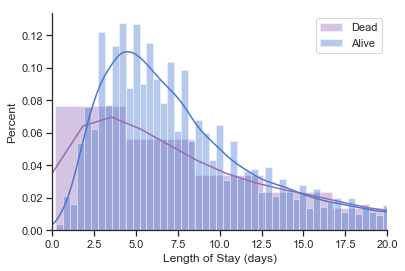

In [84]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.distplot(final_table[final_table['HOSPITAL_EXPIRE_FLAG'] == 1]['length_of_stay_days'], color='m', label="Dead")
sns.distplot(final_table[final_table['HOSPITAL_EXPIRE_FLAG'] == 0]['length_of_stay_days'], color='b', label="Alive")
sns.despine()
ax.set(xlabel='Length of Stay (days)', ylabel='Percent')
ax.set_xlim(0, 20)
ax.legend()

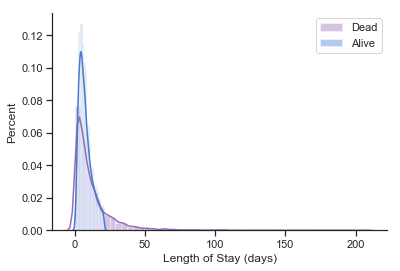

In [85]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.distplot(final_table[final_table['HOSPITAL_EXPIRE_FLAG'] == 1]['length_of_stay_days'], color='m', label="Dead")
sns.distplot(final_table[final_table['HOSPITAL_EXPIRE_FLAG'] == 0]['length_of_stay_days'], color='b', label="Alive")
sns.despine()
ax.set(xlabel='Length of Stay (days)', ylabel='Percent')
ax.legend()

In [129]:
# Subset some of the data to make the figures easier to make
small_set = final_patients_admissions[['ADMISSION_TYPE', 'HOSPITAL_EXPIRE_FLAG', 'GENDER']]

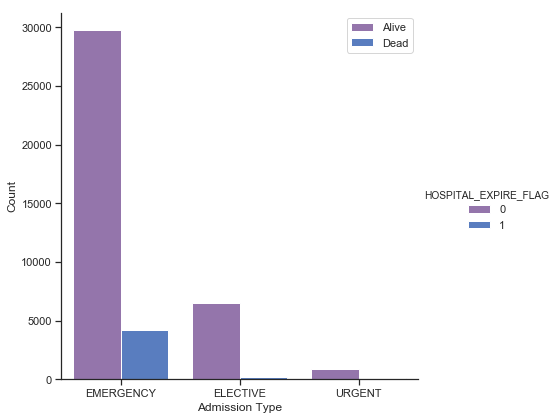

In [146]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.catplot(x="ADMISSION_TYPE", data=small_set, hue="HOSPITAL_EXPIRE_FLAG",
                height=6, kind="count", palette=(['m', 'b']))
sns.despine()
ax.set(xlabel='Admission Type', ylabel='Count')
plt.legend(labels=['Alive', 'Dead'])

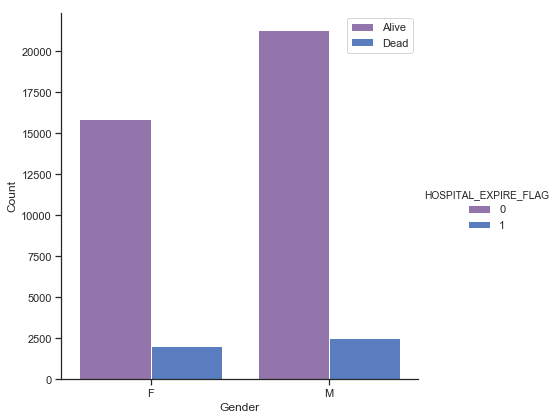

In [31]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.catplot(x="GENDER", data=small_set, hue="HOSPITAL_EXPIRE_FLAG",
                height=6, kind="count", palette=(['m', 'b']))
sns.despine()
ax.set(xlabel='Gender', ylabel='Count')
plt.legend(labels=['Alive', 'Dead'])

In [33]:
feature_table = pd.read_csv('/Users/shanduzamm/Abbi Data Sci 590/Final Project/data/feature_with_label_all_48H.csv')

In [34]:
feature_table_down = pd.DataFrame(feature_table.loc[feature_table['HADM_ID'].isin(final_HADM_ID)])

In [39]:
feature_table_down.columns.values

array(['Chloride_max', 'Creatinine_max', 'Glucose_max', 'Hematocrit_max',
       'Hemoglobin_max', 'Platelets_max', 'Potassium_max',
       'Red blood cell count_max', 'Sodium_max',
       'White blood cell count_max', 'Chloride_min', 'Creatinine_min',
       'Glucose_min', 'Hematocrit_min', 'Hemoglobin_min', 'Platelets_min',
       'Potassium_min', 'Red blood cell count_min', 'Sodium_min',
       'White blood cell count_min', 'Chloride_mean', 'Creatinine_mean',
       'Glucose_mean', 'Hematocrit_mean', 'Hemoglobin_mean',
       'Platelets_mean', 'Potassium_mean', 'Red blood cell count_mean',
       'Sodium_mean', 'White blood cell count_mean',
       'Diastolic blood pressure_max',
       'Glascow coma scale eye opening_max',
       'Glascow coma scale motor response_max',
       'Glascow coma scale verbal response_max', 'Heart Rate_max',
       'Mean blood pressure_max', 'Oxygen saturation_max',
       'Respiratory rate_max', 'Systolic blood pressure_max',
       'Temperature_max', '

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

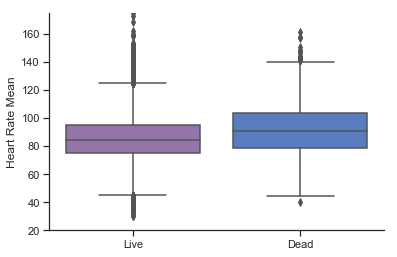

In [123]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Heart Rate_mean", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(20, 175)
ax.set(xlabel='', ylabel='Heart Rate Mean')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

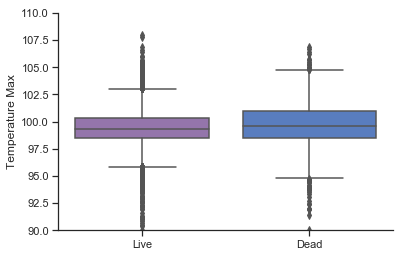

In [77]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Temperature_max", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(90, 110)
ax.set(xlabel='', ylabel='Temperature Max')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

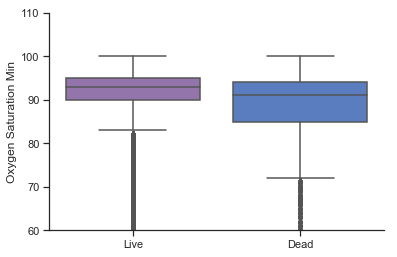

In [85]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Oxygen saturation_min", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(60, 110)
ax.set(xlabel='', ylabel='Oxygen Saturation Min')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

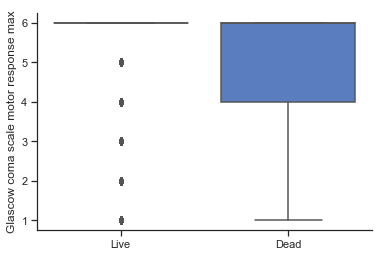

In [130]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Glascow coma scale motor response_max", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set(xlabel='', ylabel='Glascow coma scale motor response max')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

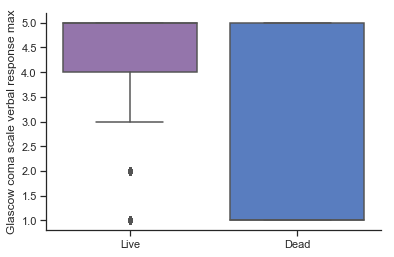

In [98]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Glascow coma scale verbal response_max", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set(xlabel='', ylabel='Glascow coma scale verbal response max')
ax.set(xticklabels=['Live', 'Dead'])
# ax.set(title='Glascow coma scale verbal response max')

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

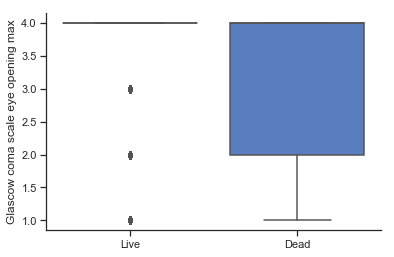

In [100]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Glascow coma scale eye opening_max", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set(xlabel='', ylabel='Glascow coma scale eye opening max')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

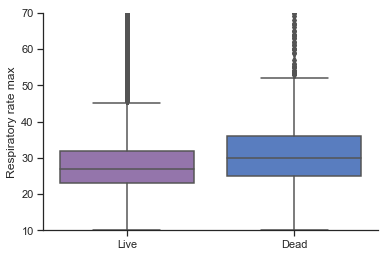

In [111]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Respiratory rate_max", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(10, 70)
ax.set(xlabel='', ylabel='Respiratory rate max')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

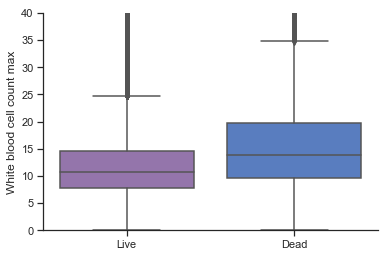

In [121]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="White blood cell count_max", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(0, 40)
ax.set(xlabel='', ylabel='White blood cell count max')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

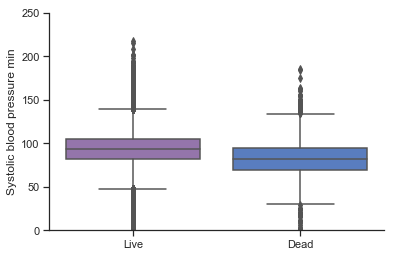

In [140]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Systolic blood pressure_min", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(0, 250)
ax.set(xlabel='', ylabel='Systolic blood pressure min')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

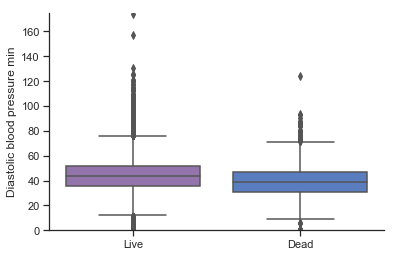

In [157]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Diastolic blood pressure_min", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(0, 175)
ax.set(xlabel='', ylabel='Diastolic blood pressure min')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

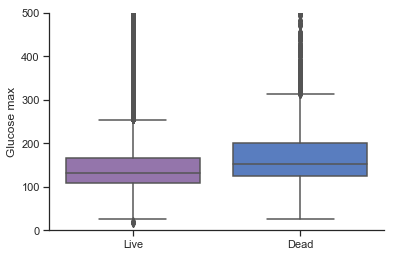

In [153]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Glucose_max", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(0, 500)
ax.set(xlabel='', ylabel='Glucose max')
ax.set(xticklabels=['Live', 'Dead'])

[[Text(0, 0, 'Live'), Text(0, 0, 'Dead')]]

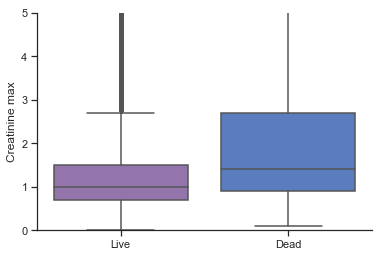

In [154]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.boxplot(x="label", y="Creatinine_max", data=feature_table_down, palette=(['m', 'b']))
sns.despine()
ax.set_ylim(0, 5)
ax.set(xlabel='', ylabel='Creatinine max')
ax.set(xticklabels=['Live', 'Dead'])